In [196]:
import pandas as pd

In [197]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [198]:
df_train = pd.read_csv('train.csv', index_col="PassengerId")
df_test = pd.read_csv('test.csv', index_col="PassengerId")

In [199]:
df_full = pd.concat([df_train,df_test])

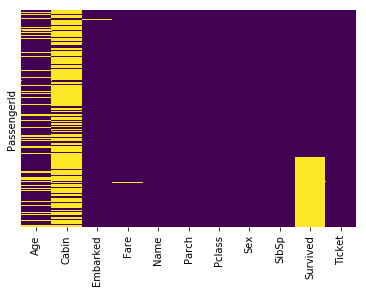

In [200]:
sns.heatmap(df_full.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [201]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [202]:
df_full['Age'].median()

28.0

In [203]:
df_full[(df_full['Sex']=='male') & (df_full['Pclass']==1)]['Age'].median()

42.0

In [204]:
age_median  = {}

In [205]:
for i in range(1,4):
    male_index = 'male' + str(i)
    female_index = 'female' + str(i)
    age_median[male_index] = df_full[(df_full['Sex']=='male') & (df_full['Pclass']==i)]['Age'].median()
    age_median[female_index] = df_full[(df_full['Sex']=='female') & (df_full['Pclass']==i)]['Age'].median()

In [206]:
def impute_age(cols):
    age = cols[0]
    Pclass = cols[1]
    sex = cols[2]
    if pd.isnull(age):
        return age_median[sex+str(Pclass)]
    else:
        return age

In [207]:
def fill_age(df):
    df['Age']= df[['Age', 'Pclass', 'Sex']].apply(impute_age,axis=1)
    return df

In [208]:
def fill_embarked(df):
    df[['Emnarked_C', 'Emnarked_Q','Emnarked_S']] = pd.get_dummies(df['Embarked'])
    return df

In [209]:
def fill_fare(df):
    df['Fare'].fillna(df['Fare'].median(),inplace=True)
    return df

In [210]:
def fill_sex(df):
    df[['female', 'male']] = pd.get_dummies(df['Sex'])
    return df

In [211]:
def drop_non_num(df):
    df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
    return df

In [212]:
df_final=(df_train.pipe(fill_age)
         .pipe(fill_fare)
         .pipe(fill_embarked)
         .pipe(fill_sex)
         .pipe(drop_non_num))

In [216]:
from sklearn.model_selection import train_test_split

In [223]:
X = df_final.drop('Survived', axis=1)
y = df_final['Survived']

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [225]:
from sklearn.linear_model import LogisticRegression

In [226]:
lr = LogisticRegression()

In [227]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [229]:
predictions=lr.predict(X_test)

In [230]:
from sklearn.metrics import confusion_matrix , classification_report

In [231]:
confusion_matrix(y_test,predictions)

array([[156,  19],
       [ 33,  87]])

In [233]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.83      0.89      0.86       175
          1       0.82      0.72      0.77       120

avg / total       0.82      0.82      0.82       295



In [234]:
df_final=(df_test.pipe(fill_age)
         .pipe(fill_fare)
         .pipe(fill_embarked)
         .pipe(fill_sex)
         .pipe(drop_non_num))

In [236]:
predictions=lr.predict(df_final)

In [238]:
df_results = pd.DataFrame(predictions,columns=['Survived'], index=df_final.index)

In [239]:
pd.DataFrame.to_csv(df_results, path_or_buf='Titatic_Testing.csv')